# 18장 시퀀스 배열로 다루는 순환 신경망(RNN)

## 1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터를 확인해 보겠습니다.
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [2]:
# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]), verbose=0)

Epoch 1/200
450/450 [==============================] - 11s 8ms/step - loss: 2.2029 - accuracy: 0.4263 - val_loss: 1.9954 - val_accuracy: 0.4590
Epoch 2/200
450/450 [==============================] - 3s 7ms/step - loss: 1.7571 - accuracy: 0.5450 - val_loss: 1.6841 - val_accuracy: 0.5668
Epoch 3/200
450/450 [==============================] - 3s 8ms/step - loss: 1.6234 - accuracy: 0.5874 - val_loss: 1.5504 - val_accuracy: 0.6264
Epoch 4/200
450/450 [==============================] - 3s 7ms/step - loss: 1.4281 - accuracy: 0.6433 - val_loss: 1.4091 - val_accuracy: 0.6558
Epoch 5/200
450/450 [==============================] - 3s 7ms/step - loss: 1.2895 - accuracy: 0.6779 - val_loss: 1.3305 - val_accuracy: 0.6696
Epoch 6/200
450/450 [==============================] - 3s 7ms/step - loss: 1.2033 - accuracy: 0.6949 - val_loss: 1.2816 - val_accuracy: 0.6696
Epoch 7/200
450/450 [==============================] - 3s 8ms/step - loss: 1.1264 - accuracy: 0.7149 - val_loss: 1.2379 - val_accuracy: 0.688

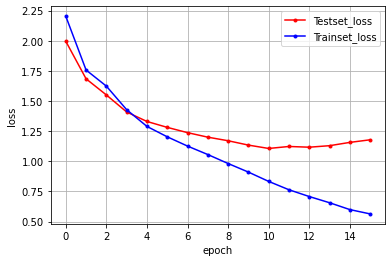

In [3]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()